# Clustering Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## K- Means Clustering

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\iris\iris2.csv")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


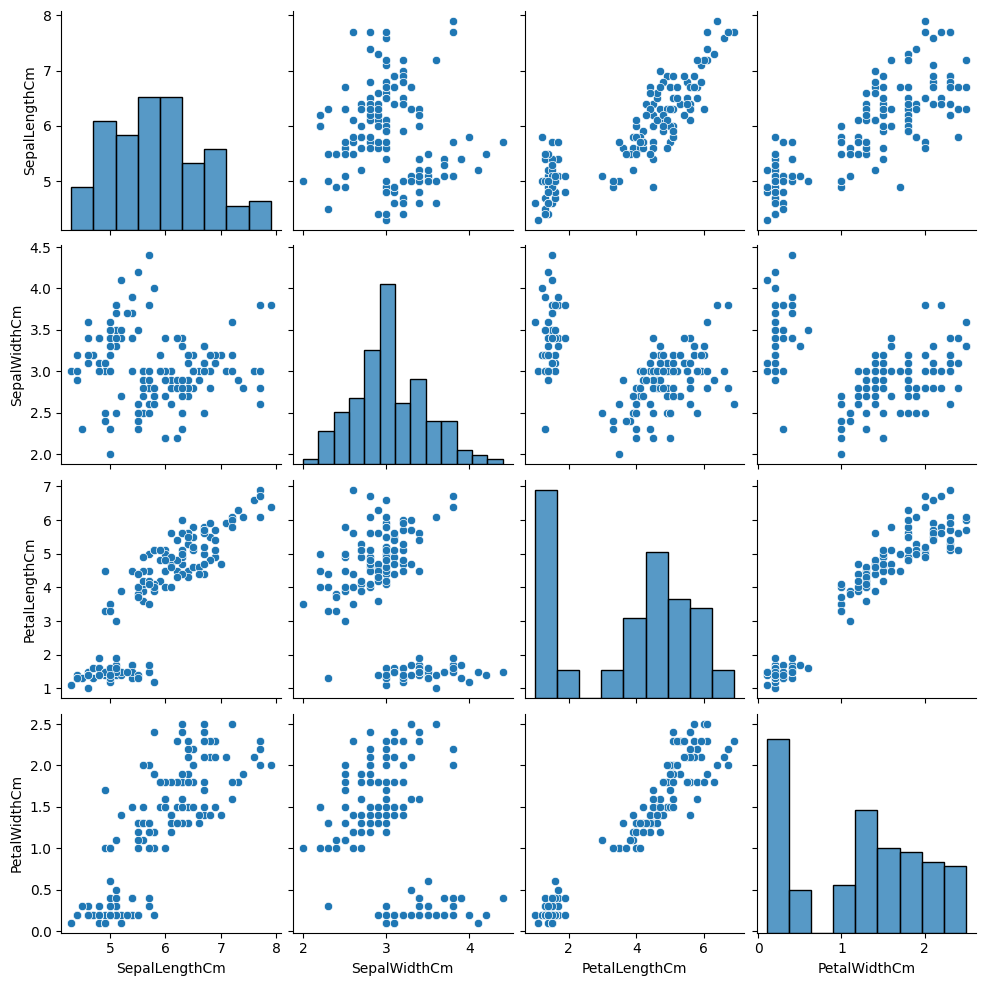

In [3]:
sns.pairplot(data=df)
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=8, init='k-means++')
    km.fit(df)
    wcss.append(km.inertia_)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

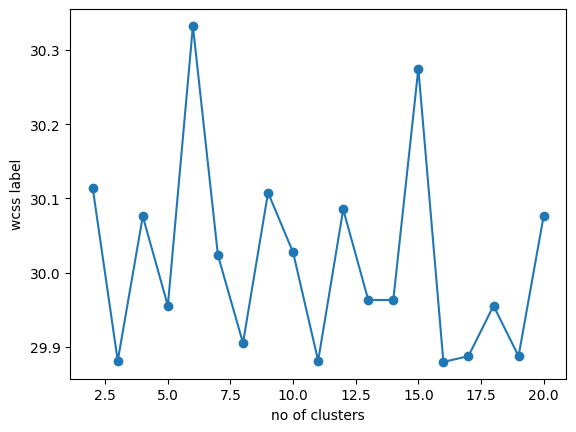

In [6]:
plt.plot([i for i in range(2,21)],wcss, marker= "o")
plt.xticks()
plt.xlabel("no of clusters")
plt.ylabel("wcss label")
plt.show()
         

In [7]:
kmn = KMeans(n_clusters=3)
df["Predict"] = kmn.fit_predict(df)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


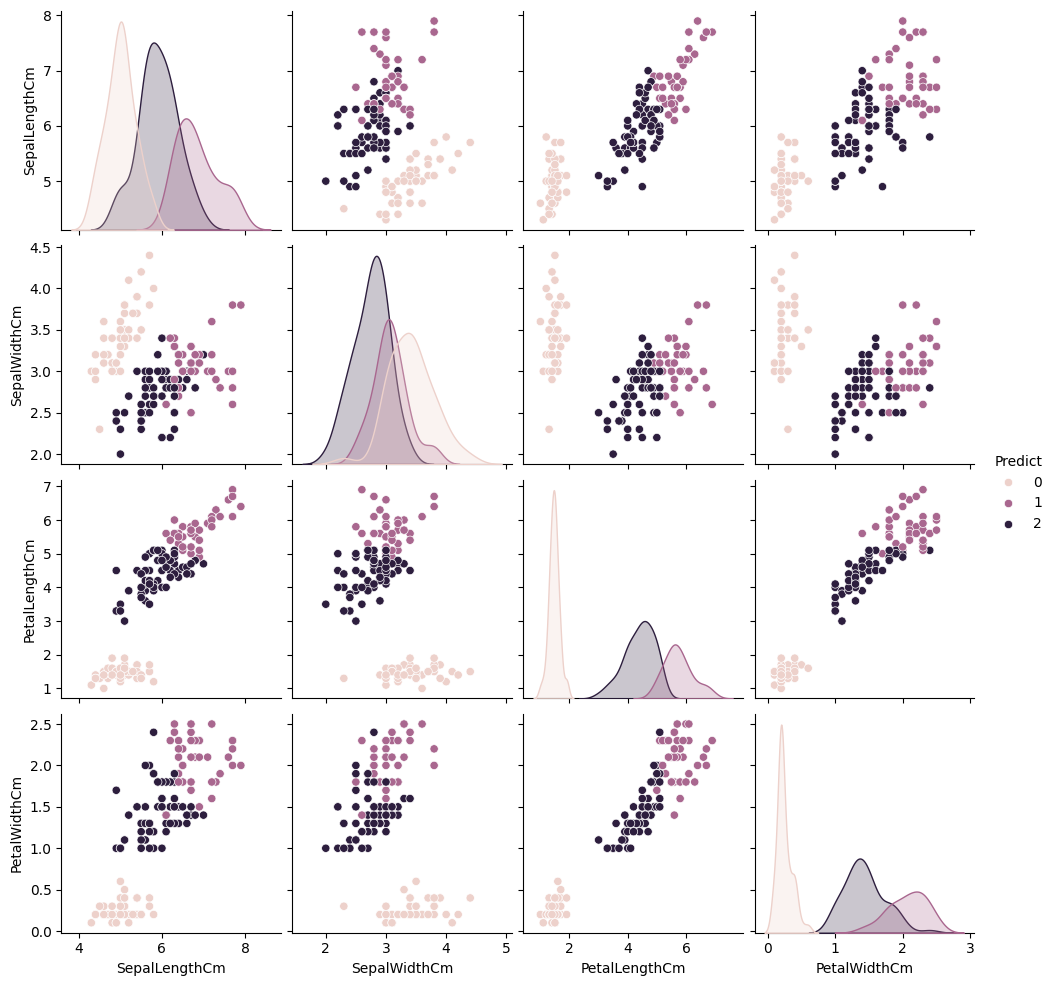

In [9]:
sns.pairplot(data=df, hue= "Predict")
plt.show()

##  Hierarchical Clustering

### Agglomerative Hierarchical Clustering

In [10]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\iris\iris2.csv")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


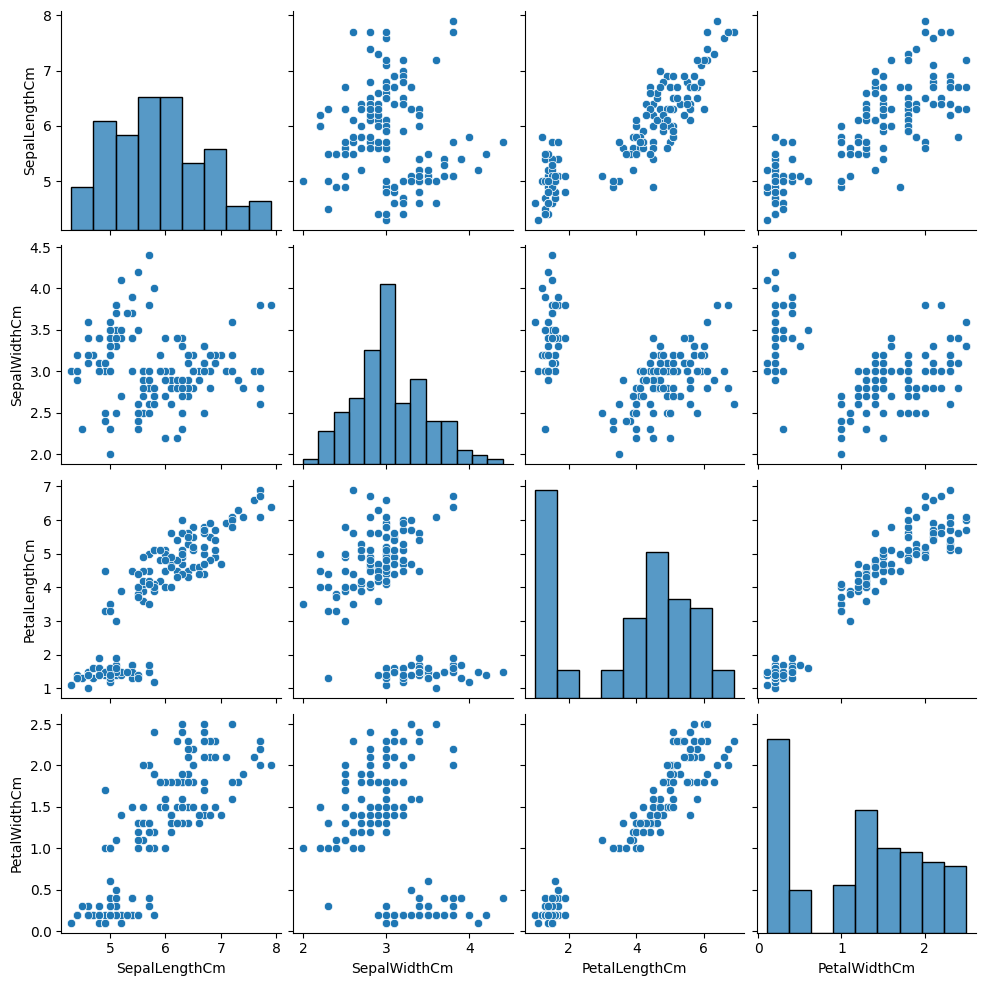

In [11]:
sns.pairplot(data=df)
plt.show()

In [12]:
import scipy.cluster.hierarchy as sc

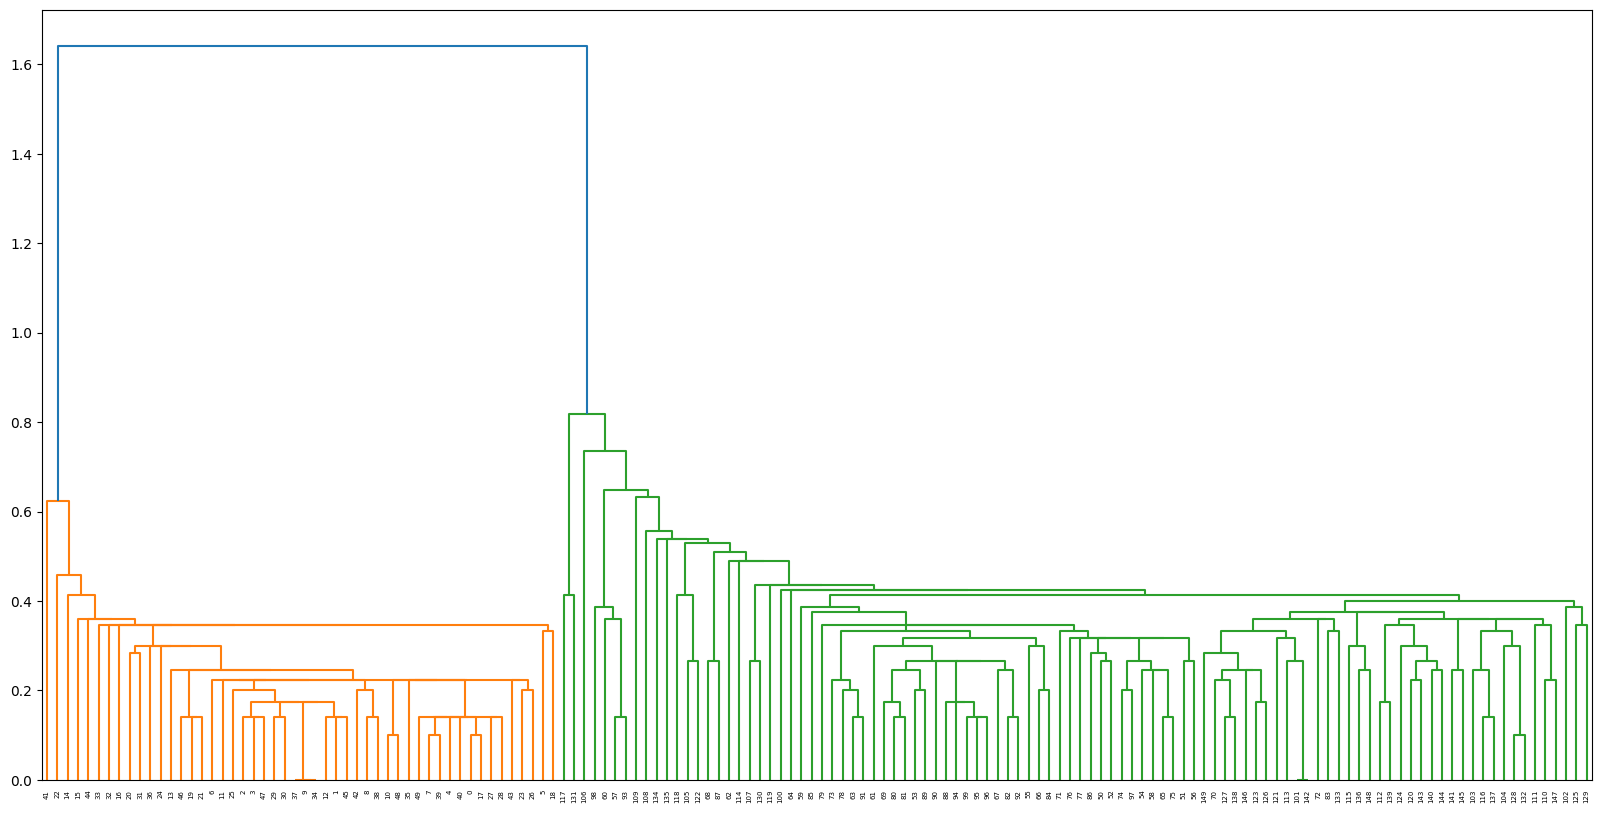

In [13]:
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(df, method="single",metric="euclidean"))
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
ac = AgglomerativeClustering(n_clusters=2 , linkage="single")
df["predict"] = ac.fit_predict(df)

df.head(5)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


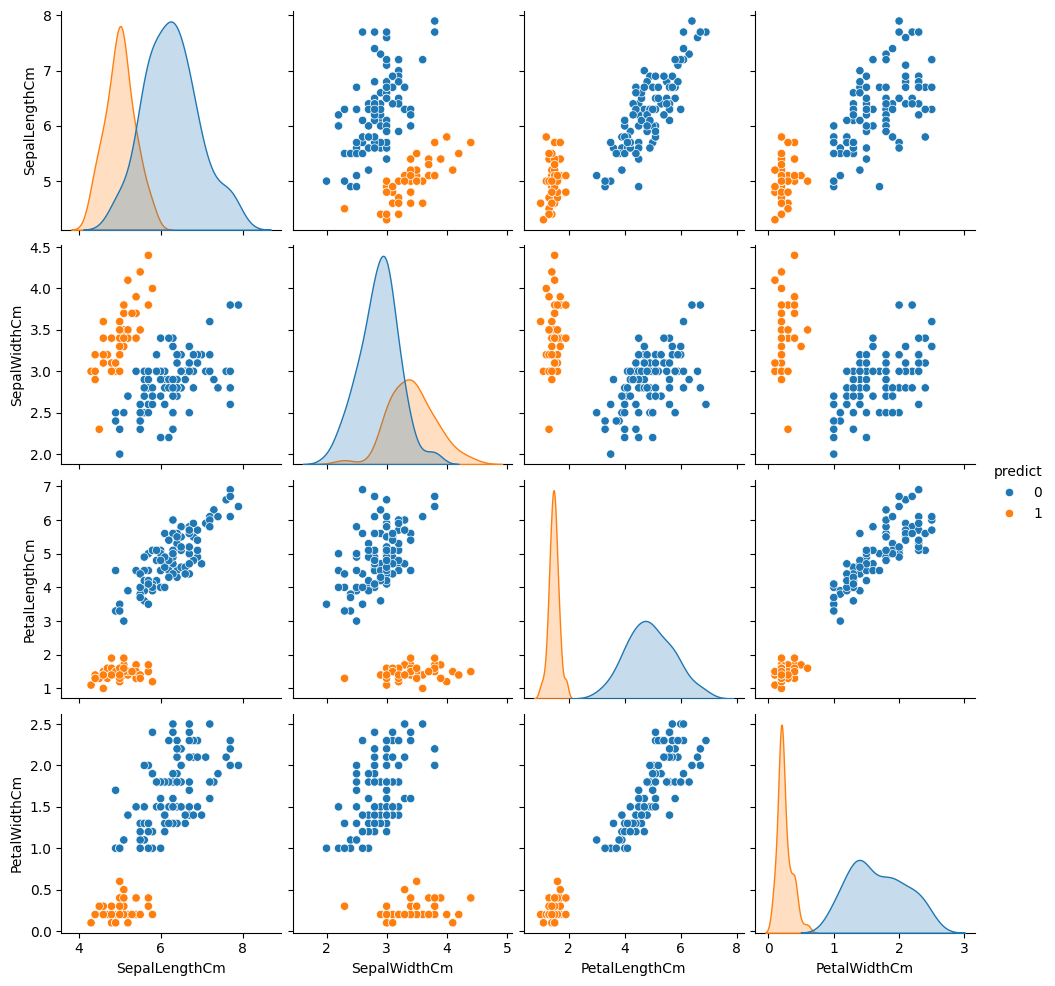

In [16]:
sns.pairplot(data=df , hue="predict")
plt.show()

## DBSCAN Clustering Algorithm

In [17]:
from sklearn.datasets import make_moons

In [18]:
x,y = make_moons(n_samples=250,noise=0.05)

In [19]:
dt = {"data1":x[:,0], "data2":x[:,1]}

In [20]:
dt = pd.DataFrame(dt)

In [21]:
dt.head(4)

,data1,data2
0,1.602216,-0.279288
1,-0.607364,0.764138
2,1.982498,0.199008
3,1.977012,0.397013


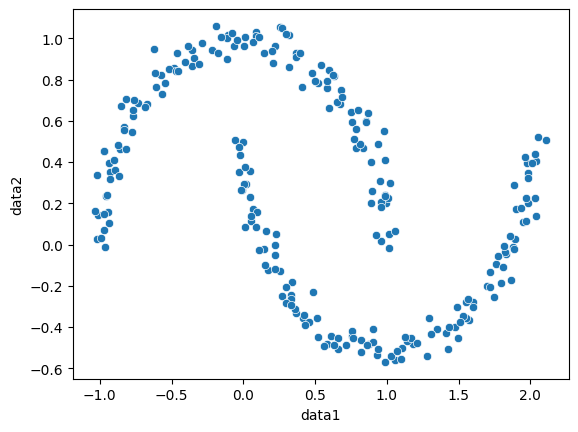

In [22]:
sns.scatterplot(x="data1" , y="data2" , data=dt)
plt.show()

In [23]:
from sklearn.cluster import DBSCAN


In [24]:
db = DBSCAN(eps=0.2,
    min_samples=5,
    metric='euclidean')
dt["predict"] = db.fit_predict(dt)

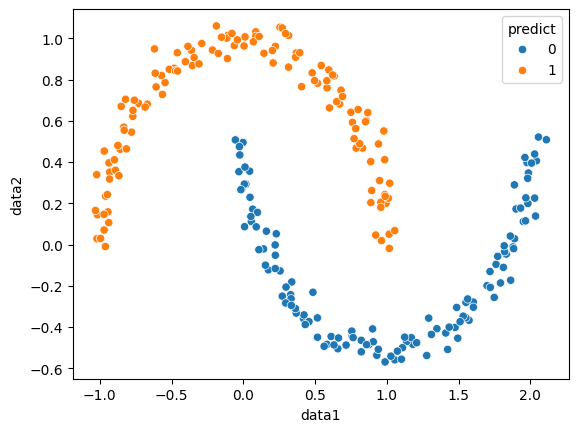

In [25]:
sns.scatterplot(x="data1" , y="data2" ,hue= "predict", data=dt)
plt.show()

### Silhouette Score

In [26]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\iris\iris2.csv")
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [27]:
from sklearn.metrics import silhouette_score

In [28]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [29]:
silhouette_score(df, labels=kmn.labels_)

0.5525919445499757

In [30]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=1)
    km1.fit_predict(df)
    ss.append(silhouette_score(df, labels=kmn.labels_))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

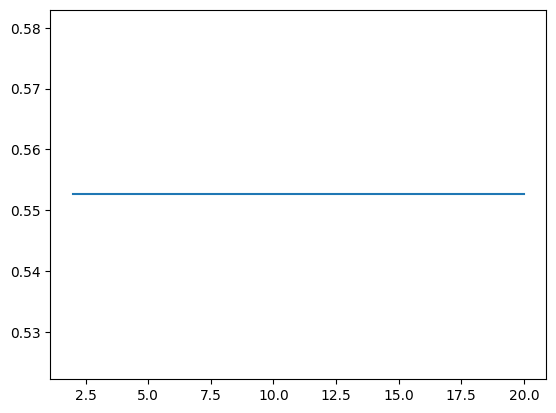

In [31]:
plt.plot(no_c,ss)
plt.xticks()
plt.show()

## Association Rule Learning

### Apriori Algorithm

In [32]:
df = pd.read_csv(r"C:\Users\User\Desktop\study material\projects\datasets\ML ALGO PROJECTS\groceroes\grocery.csv")
df.head(2)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
market = []
for i in range(0,df.shape[0]):
    cus= []
    for j in df.columns:
        if type(df[j][i]) == str:
            cus.append(df[j][i])
    market.append(cus)

In [34]:
market

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [35]:
l = []
for i in market:
    print(i)
    for j in i:
        l.append(j)

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
['tropical fruit', 'yogurt', 'coffee']
['whole milk']
['pip fruit', 'yogurt', 'cream cheese', 'meat spreads']
['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']
['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner']
['rolls/buns']
['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)']
['potted plants']
['whole milk', 'cereals']
['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate']
['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes']
['beef']
['frankfurter', 'rolls/buns', 'soda']
['chicken', 'tropical fruit']
['butter', 'sugar', 'fruit/vegetable juice', 'newspapers']
['fruit/vegetable juice']
['packaged fruit/vegetables']
['chocolate']
['specialty bar']
['other vegetables']
['butter milk', 'pastry']
['whole milk']
['tropical fruit', 'cream cheese', 'processed chees

In [36]:
import collections

In [37]:
p = collections.Counter(l)
p

Counter({'whole milk': 2513,
         'other vegetables': 1903,
         'rolls/buns': 1809,
         'soda': 1715,
         'yogurt': 1372,
         'bottled water': 1087,
         'root vegetables': 1072,
         'tropical fruit': 1032,
         'shopping bags': 969,
         'sausage': 924,
         'pastry': 875,
         'citrus fruit': 814,
         'bottled beer': 792,
         'newspapers': 785,
         'canned beer': 764,
         'pip fruit': 744,
         'fruit/vegetable juice': 711,
         'whipped/sour cream': 705,
         'brown bread': 638,
         'domestic eggs': 624,
         'frankfurter': 580,
         'margarine': 576,
         'coffee': 571,
         'pork': 567,
         'butter': 545,
         'curd': 524,
         'beef': 516,
         'napkins': 515,
         'chocolate': 488,
         'frozen vegetables': 473,
         'chicken': 422,
         'white bread': 414,
         'cream cheese': 390,
         'waffles': 378,
         'salty snack': 372,
      

In [38]:
d  = {"item name":p.keys(),  "values":p.values()}

In [39]:
pd.DataFrame(d).sort_values(by="values", ascending=False)

,item name,values
7,whole milk,2513
11,other vegetables,1903
17,rolls/buns,1809
31,soda,1715
5,yogurt,1372
...,...,...
164,bags,4
167,kitchen utensil,4
168,preservation products,2
159,baby food,1


In [40]:
from mlxtend.preprocessing import TransactionEncoder

In [41]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [42]:
new_df = pd.DataFrame(tr.transform(market),columns = tr.columns_)

In [43]:
new_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
from mlxtend.frequent_patterns import apriori

In [45]:
apriori(new_df ,min_support=0.06,use_colnames=True, max_len=3).sort_values(by = "support")

,support,itemsets
5,0.063447,(domestic eggs)
2,0.064870,(brown bread)
17,0.071683,(whipped/sour cream)
6,0.072293,(fruit/vegetable juice)
20,0.074835,"(other vegetables, whole milk)"
10,0.075648,(pip fruit)
3,0.077682,(canned beer)
7,0.079817,(newspapers)
0,0.080529,(bottled beer)
4,0.082766,(citrus fruit)


### Frequent Pattern Growth Algorithm

In [46]:
new_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
from mlxtend.frequent_patterns import fpgrowth

In [48]:
fpgrowth(new_df, min_support=0.07, use_colnames=True, max_len=3).sort_values(by = "support")

,support,itemsets
17,0.071683,(whipped/sour cream)
11,0.072293,(fruit/vegetable juice)
18,0.074835,"(other vegetables, whole milk)"
4,0.075648,(pip fruit)
14,0.077682,(canned beer)
10,0.079817,(newspapers)
7,0.080529,(bottled beer)
0,0.082766,(citrus fruit)
12,0.088968,(pastry)
15,0.093950,(sausage)


## Ensemble Learning